## Haberman Cancer Survival dataset

Toy Dataset: Haberman Dataset (Source: https://www.kaggle.com/gilsousa/habermans-survival-data-set)

- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
- Number of Attributes: 4 (including the class attribute)
- Objective:To find which feature (age of the patient/year of operation/number of Aux nodes) affects the most for Survival of     the patient after Surgery.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
hcs = pd.read_csv("haberman.csv")
hcs.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### number of datapoints and features :

In [2]:
print(hcs.shape)

(306, 4)


### Column names and their description :

In [3]:
print(hcs.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


   #### Column description :
   
   - age - Age of patient at time of operation (numerical)
   - year - Patient's year of operation (year - 1900, numerical)
   - nodes - Number of positive axillary nodes detected (numerical)
   - status - Survival status (class attribute)
        - 1 : the patient survived 5 years or longer
        - 2 : the patient died within 5 year

### number of patients survived more than 5 years(1) and died within 5 years(2)

In [4]:
print(hcs["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


## Univariate Analysis:

### PDF :

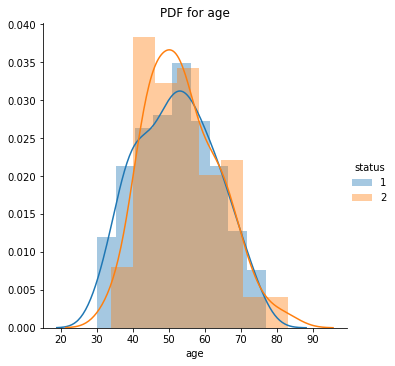

In [5]:
# PDF for age

sns.FacetGrid(hcs,hue="status",size=5)\
    .map(sns.distplot,"age")\
        .add_legend()
plt.title("PDF for age")
plt.show()

#### Observations:
- age feature shows lot of overlap between the two classes.
- It can be seen that people with age 45-60 have undergone the cancer surgery the most.
- PDF is almost normally distributed

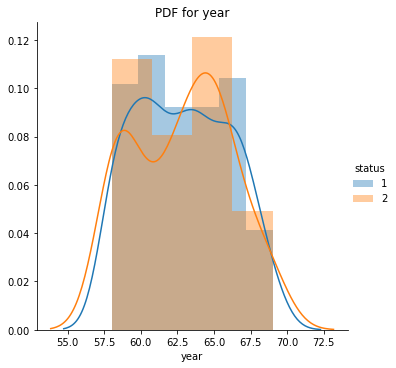

In [6]:
# PDF for year

sns.FacetGrid(hcs,hue='status',size=5)\
    .map(sns.distplot,'year')\
        .add_legend()
plt.title("PDF for year")
plt.show()

### Observations :

- year feature also shows lot of overlap between the two classes.
- From blue peak we can see that for surgeries performed between 1960-1962,patients survived more than 5 years after surgery.    - From orange peak we can see that for surgeries performed between 1963-1966,patients died within 5 years of surgery.

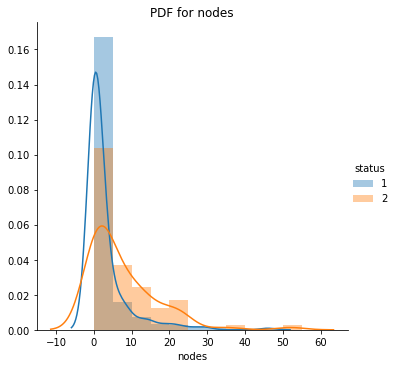

In [7]:
# PDF for nodes

binn=[i*5 for i in range(0,12)]
sns.FacetGrid(hcs,hue="status", size=5)\
    .map(sns.distplot,"nodes",bins=binn)\
        .add_legend()
plt.title("PDF for nodes")
plt.show()

### Observations:

- nodes feature also shows lot of overlap between the two classes.
- Most people who have survived more than 5 years and died within 5 years after the surgery had 0-5 positive axillary nodes.

### CDF :

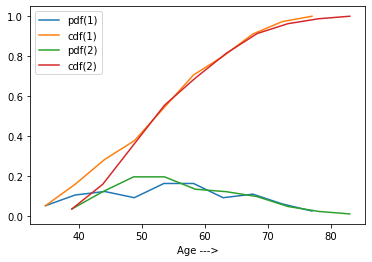

In [8]:
# CDF for age

one = hcs[hcs.status == 1]
two = hcs[hcs.status == 2]

# CDF of age for people who survived more than 5 years after Surgery

counts,bin_edges = np.histogram(one['age'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#CDF of age for people who within 5 years after Surgery

counts,bin_edges = np.histogram(two['age'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Age --->")
plt.legend(["pdf(1)","cdf(1)","pdf(2)","cdf(2)"])
plt.show()

#### Observations :
- CDF for patients survived after 5 years and died within 5 years is almost same for age 50 and above.
- From the CDFs we can say 80% of the patients for both the classes are under the age 65.

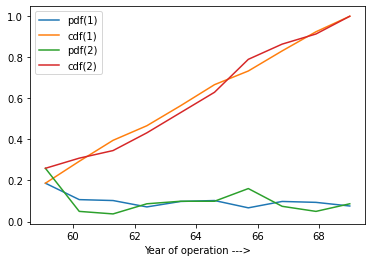

In [9]:
# CDF of year under which patients has undergone operation and survived more than 5 years.

counts,bin_edges = np.histogram(one['year'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# CDF of year under which patients has undergone operation and died within 5 years.

counts,bin_edges = np.histogram(two['year'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Year of operation --->")
plt.legend(["pdf(1)","cdf(1)","pdf(2)","cdf(2)"])
plt.show()

#### Observations :
- From the CDFs we can say 70% of the patients for both the classes were operated between 1959-65

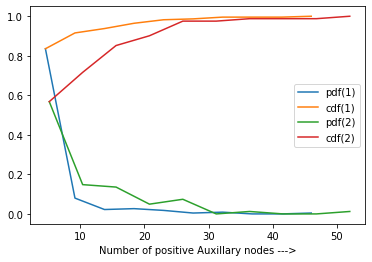

In [10]:
# CDF of number of Auxillary nodes for patients who survived more than 5 years.

counts,bin_edges = np.histogram(one['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# CDF of number of Auxillary nodes for patients who died within 5 years.

counts,bin_edges = np.histogram(two['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Number of positive Auxillary nodes --->")
plt.legend(["pdf(1)","cdf(1)","pdf(2)","cdf(2)"])
plt.show()

#### Observations:
- 82% of the patients who survived more than 5 years had 0-5 Aux nodes.
- 58% of the patients who died within 5 years had 0-5 Aux nodes.

### Box Plot :


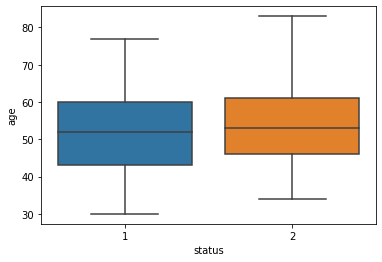

In [11]:
sns.boxplot(x='status',y='age', data=hcs)
plt.show()

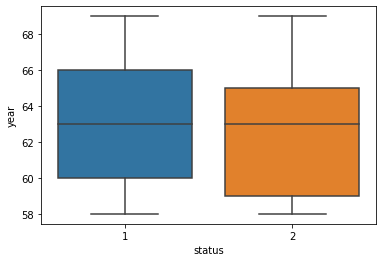

In [12]:
sns.boxplot(x='status',y='year', data=hcs)
plt.show()

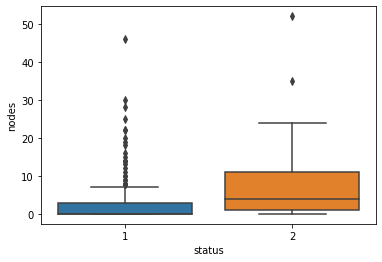

In [13]:
sns.boxplot(x='status',y='nodes', data=hcs)
plt.show()

#### Observations :
- age and year don't have any outliers.
- For number of Aux nodes we can see the outliers.
    - Patients having more than 8 positive axial nodes have less probability of survival.

### Violin Plot :

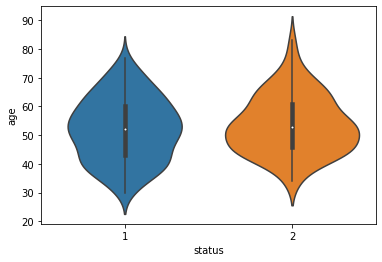

In [14]:
sns.violinplot(x="status", y="age", data=hcs, size=8)
plt.show()

#### Observations :
- Majority of the patients who undergone the operation were between 40-65 in age.

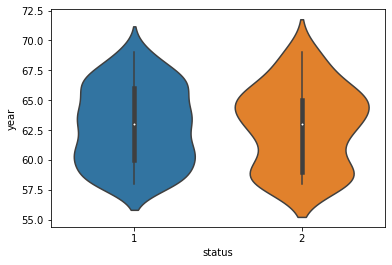

In [15]:
sns.violinplot(x="status", y="year", data=hcs, size=8)
plt.show()

#### Observations :
- Majority of the the operations were conducted between 1958-1967

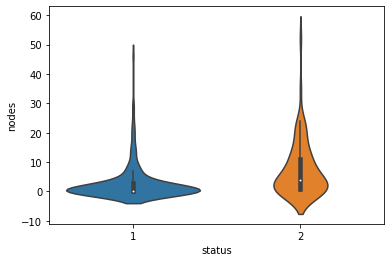

In [16]:
sns.violinplot(x="status", y="nodes", data=hcs, size=8)
plt.show()

#### Observations :
- Majority of the patients who survived had 0-6 Aux nodes
- around 40% of the patients who died within 5 years had more than 6 Aux nodes

## Bivariate Analysis :

### 2-D Scatter Plot :

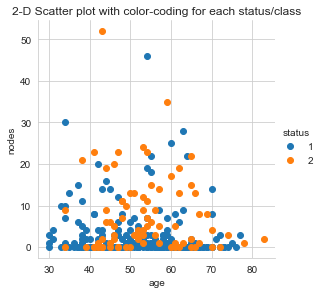

In [17]:
# 2-D Scatter plot for age and nodes

sns.set_style("whitegrid");
sns.FacetGrid(hcs, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each status/class')
plt.show();

#### Observations :
- We can't tell anything with this graph
- Points for each class intersected.
- we get the similar results for nodes-year,age-year 2-D scatter plots.

### Pair-Plots :

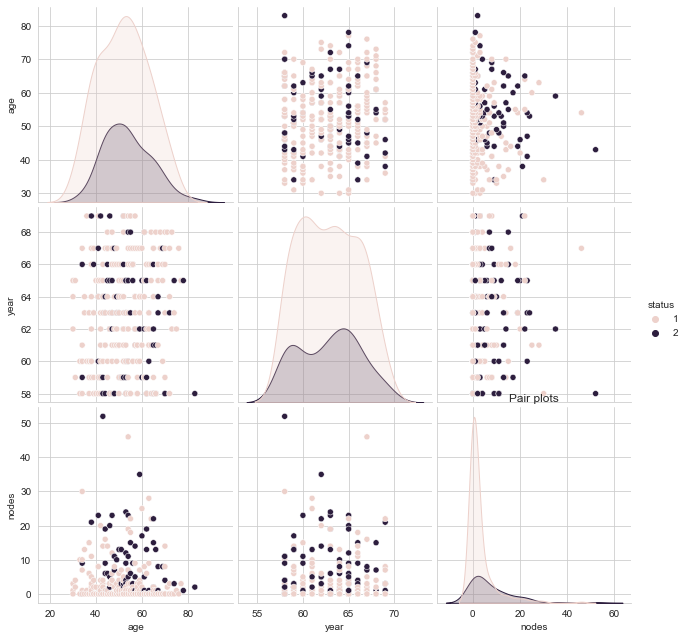

In [18]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hcs, hue="status", size=3);
plt.title('Pair plots')
plt.show()

#### Observations :
- We can see that we can't tell anything through these graphs since all the points are overlapped.

## Summary :
- We can't really say the key feature for the classification but we can consider 'nodes'.
- Patients who had more than 5 nodes are mostly likely to die within 5 years after the surgery.
- We could also see most of the patients were between 40-65 in age.
